<a href="https://colab.research.google.com/github/Paradorn657/CNNs/blob/master/stockpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [2]:

import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [3]:
dataframe = quandl.get("WIKI/FB")
dataframe 

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0


In [4]:
dataframe = dataframe[["Adj. Close"]]
dataframe["prediction"] = dataframe[["Adj. Close"]].shift(-30)
dataframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj. Close,prediction
Date,,
2012-05-18,38.2318,30.771
2012-05-21,34.0300,31.200
2012-05-22,31.0000,31.470
2012-05-23,32.0000,31.730
2012-05-24,33.0300,32.170
...,...,...
2018-03-21,169.3900,NaN
2018-03-22,164.8900,NaN
2018-03-23,159.3900,NaN


In [5]:
a = [1,2,3,4,5,6,9,7,8,9]
a[:-3]

[1, 2, 3, 4, 5, 6, 9]

In [6]:
X = np.array(dataframe["Adj. Close"])
X = X[:-30]
X

array([ 38.2318,  34.03  ,  31.    , ..., 171.5499, 175.98  , 176.41  ])

In [7]:
len(X)

1442

In [8]:
y = np.array(dataframe["prediction"])
y = y[:-30]
y

array([ 30.771,  31.2  ,  31.47 , ..., 159.39 , 160.06 , 152.19 ])

In [9]:
len(X)==len(y)

True

In [10]:
import tensorflow

In [28]:
import matplotlib.pyplot as plt


In [21]:
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(100,activation="relu"))
model.add(tensorflow.keras.layers.Dense(100,activation="relu"))
model.add(tensorflow.keras.layers.Dense(1))


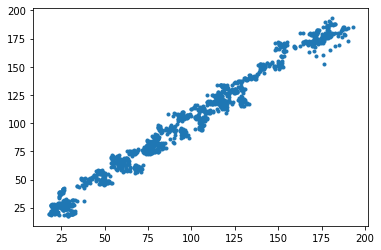

In [30]:
plt.plot(X,y,".")
plt.show()

In [ ]:
model.compile("Adam",loss=tensorflow.keras.losses.mean_absolute_error)
model.fit(X[:-5],y[:-5],epochs=300)

In [47]:
model.predict(X[-1].reshape(-1,1))

array([[182.1053]], dtype=float32)

SKLEARN


In [32]:
reg = LinearRegression().fit(X.reshape(-1,1), y)

In [35]:
reg.score(X.reshape(-1,1),y)

0.9804471106061585

In [43]:
reg.predict(X[-1].reshape(-1,1))

array([180.30099429])

In [56]:
def testskandtensorflow(data,i):
  print(f"**{data}** sklearn predict -> {reg.predict(data.reshape(-1,1))} \n tensorflow -> {model.predict(data.reshape(-1,1))} \n ค่าจริงๆ = {y[-i]} \n\n")

In [57]:
for i in range(5):
  testskandtensorflow(X[-i],i)

**38.2318** sklearn predict -> [40.80903751] 
 tensorflow -> [[41.12476]] 
 ค่าจริงๆ = 30.771 


**176.41** sklearn predict -> [180.30099429] 
 tensorflow -> [[182.1053]] 
 ค่าจริงๆ = 152.19 


**175.98** sklearn predict -> [179.86690598] 
 tensorflow -> [[181.66956]] 
 ค่าจริงๆ = 160.06 


**171.5499** sklearn predict -> [175.39468592] 
 tensorflow -> [[177.18056]] 
 ค่าจริงๆ = 159.39 


**180.18** sklearn predict -> [184.10683832] 
 tensorflow -> [[185.92542]] 
 ค่าจริงๆ = 164.89 


